# Bermudan Swaption Pricing using HW and BDT Models -- UNFINISHED IT DOES CALLABLE BONDS

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from financepy.finutils import *
from financepy.products.bonds import *
from financepy.products.bonds.FinBond import FinBond
from financepy.products.bonds.FinBondEmbeddedOption import FinBondEmbeddedOption

from financepy.market.curves.FinDiscountCurve import FinDiscountCurve
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.products.libor.FinLiborCurve import FinLiborCurve

from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.168 - UNDER DEVELOPMENT   #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [3]:
settlementDate = FinDate(1, 1, 2007)

### Set up discount curve

In [4]:
dcType = FinDayCountTypes.ACT_360
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swap1 = FinLiborSwap(settlementDate, FinDate(1,1,2008), 0.05, fixedFreq, dcType)
swap2 = FinLiborSwap(settlementDate, FinDate(1,1,2009), 0.05, fixedFreq, dcType)
swap3 = FinLiborSwap(settlementDate, FinDate(1,1,2010), 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discountCurve = FinLiborCurve("USD_LIBOR", settlementDate, [], [], swaps)

In [5]:
print(discountCurve)

TIME: DISCOUNT FACTOR
0.0: 1.0
0.9993374255972752: 0.9511698483400085
2.0014127619496116: 0.9046015349755234
3.0007501875468865: 0.8604296990023379



### Set up the Puttable Bond

First create a bond that we will use as a reference

In [6]:
maturityDate = FinDate(1, 1, 2010)
coupon = 0.05
frequencyType = FinFrequencyTypes.ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA

In [7]:
bond = FinBond(maturityDate, coupon, frequencyType, accrualType)

In [8]:
v = bond.valueBondUsingDiscountCurve(settlementDate, discountCurve)

In [9]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62397531182314


Now specify the put and call dates

In [10]:
callDates = []
callPrices = []
putDates = [FinDate(1, 1, 2008), FinDate(1, 1, 2009), FinDate(1, 1, 2010)]
putPrices = [100.0, 100.0, 100.0]

Now create the FinBondEmbeddedOption

In [11]:
puttableBond = FinBondEmbeddedOption(maturityDate, coupon, frequencyType, accrualType,
                                     callDates, callPrices, putDates, putPrices)

### The Hull-White Model

In [12]:
sigma = 0.01  # basis point volatility
a = 0.1
numTimeSteps = 200

In [13]:
model = FinModelRatesHW(a, sigma, numTimeSteps)

In [14]:
v = puttableBond.value(settlementDate, discountCurve, model)

In [15]:
print(v)

{'bondwithoption': 108.06027025177056, 'bondpure': 99.6239753118231}


### Convergence Testing

In [16]:
timeSteps = range(20,220,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesHW(a, sigma, numTimeSteps)
    v = puttableBond.value(settlementDate, discountCurve, model)
    values.append(v['bondwithoption'])

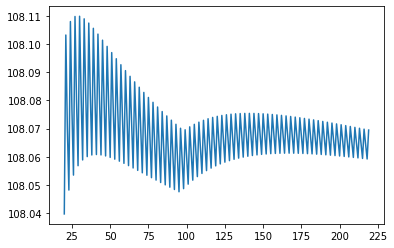

In [17]:
plt.plot(timeSteps, values)

Copyright (c) 2020 Dominic O'Kane